**Mount Google Drive to Collaboratory:**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

**Read and Display the Final Results File**

In [ ]:
data = pd.read_excel("/content/gdrive/MyDrive/ICTE_Results/Final_Results.xlsx")
data.head(10)

,Test Number,React - Energy (mWh),Angular- Energy (mWh),Vue - Energy (mWh),Svelte - Energy (mWh),React - CO2e (mg),Angular - CO2e (mg),Vue - CO2e (mg),Svelte - CO2e (mg)
0,1,29,22,21,25,14.0,11.0,10.0,12.0
1,2,20,24,26,27,9.8,12.0,13.0,13.0
2,3,27,25,20,25,13.0,12.0,9.7,12.0
3,4,21,18,20,20,10.0,8.7,9.9,9.8
4,5,23,20,20,19,11.0,9.6,10.0,9.4
5,6,20,18,19,20,9.8,9.0,9.2,9.8
6,7,23,20,18,20,11.0,9.6,9.0,9.9
7,8,22,19,20,19,11.0,9.4,9.8,9.4
8,9,19,21,21,19,9.5,10.0,10.0,9.5
9,10,22,19,19,20,11.0,9.1,9.2,9.7


**Display Descritive Analsis of the Data**

In [ ]:
data.iloc[:,1:].describe()

,React - Energy (mWh),Angular- Energy (mWh),Vue - Energy (mWh),Svelte - Energy (mWh),React - CO2e (mg),Angular - CO2e (mg),Vue - CO2e (mg),Svelte - CO2e (mg)
count,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,22.600000,20.600000,20.400000,21.400000,11.01000,10.040000,9.980000,10.450000
std,3.169297,2.412928,2.170509,3.025815,1.45789,1.209408,1.126252,1.338532
min,19.000000,18.000000,18.000000,19.000000,9.50000,8.700000,9.000000,9.400000
25%,20.250000,19.000000,19.250000,19.250000,9.85000,9.175000,9.325000,9.550000
50%,22.000000,20.000000,20.000000,20.000000,11.00000,9.600000,9.850000,9.800000
75%,23.000000,21.750000,20.750000,23.750000,11.00000,10.750000,10.000000,11.475000
max,29.000000,25.000000,26.000000,27.000000,14.00000,12.000000,13.000000,13.000000


**T-test to Compare Mean Value of Energy Consumption of 4 Frameworks**

In [ ]:
t2_ra, p_ra = stats.ttest_ind(data["React - Energy (mWh)"], data["Angular- Energy (mWh)"])
t2_rv, p_rv = stats.ttest_ind(data["React - Energy (mWh)"], data["Vue - Energy (mWh)"])
t2_rs, p_rs = stats.ttest_ind(data["React - Energy (mWh)"], data["Svelte - Energy (mWh)"])
t2_av, p_av = stats.ttest_ind(data["Angular- Energy (mWh)"], data["Vue - Energy (mWh)"])
t2_as, p_as = stats.ttest_ind(data["Angular- Energy (mWh)"], data["Svelte - Energy (mWh)"])
t2_vs, p_vs = stats.ttest_ind(data["Vue - Energy (mWh)"], data["Svelte - Energy (mWh)"])

# Two-tail 2-sample t-test
alpha_half = 0.005 # Alpha is 0.01 or level of confidence is 99%

if p_ra < alpha_half:
    print("The null hypothesis can be rejected for React and Angular")
else:
    print("The null hypothesis is accepted for React and Angular")

if p_rv < alpha_half:
    print("The null hypothesis can be rejected for React and Vue")
else:
    print("The null hypothesis is accepted for React and Vue")

if p_rs < alpha_half:
    print("The null hypothesis can be rejected for React and Svelte")
else:
    print("The null hypothesis is accepted for React and Svelte")

if p_av < alpha_half:
    print("The null hypothesis can be rejected for Angular and Vue")
else:
    print("The null hypothesis is accepted for Angular and Vue")

if p_as < alpha_half:
    print("The null hypothesis can be rejected for Angular and Svelte")
else:
    print("The null hypothesis is accepted for Angular and Svelte")

if p_vs < alpha_half:
    print("The null hypothesis can be rejected for Vue and Svelte")
else:
    print("The null hypothesis is accepted for Vue and Svelte")


The null hypothesis is accepted for React and Angular
The null hypothesis is accepted for React and Vue
The null hypothesis is accepted for React and Svelte
The null hypothesis is accepted for Angular and Vue
The null hypothesis is accepted for Angular and Svelte
The null hypothesis is accepted for Vue and Svelte


**Anova Test to Compare Mean Value of Energy Consumption of 4 Frameworks**

In [ ]:
fvalue, pvalue = stats.f_oneway(data["React - Energy (mWh)"], data["Angular- Energy (mWh)"],data["Vue - Energy (mWh)"], data["Svelte - Energy (mWh)"])
print("F Value  = {:g} ".format(fvalue))
print("P Value  = {:g} ".format(pvalue))

# Result for Confidence Level = 95%

alpha1 = 0.05

if pvalue < alpha1:
    print("The null hypothesis for alfa=0.05 can be rejected")
else:
    print("The null hypothesis for alfa=0.05 is accepted")

# Result for Confidence Level = 98%

alpha2 = 0.02

if pvalue < alpha2:
    print("The null hypothesis for alfa=0.02 can be rejected")
else:
    print("The null hypothesis for alfa=0.02 is accepted")

# Result for Confidence Level = 99%

alpha3 = 0.01

if pvalue < alpha3:
    print("The null hypothesis for alfa=0.01 can be rejected")
else:
    print("The null hypothesis for alfa=0.01 is accepted")

F Value  = 1.34081 
P Value  = 0.276411 
The null hypothesis for alfa=0.05 is accepted
The null hypothesis for alfa=0.02 is accepted
The null hypothesis for alfa=0.01 is accepted


**Graphical Representations**

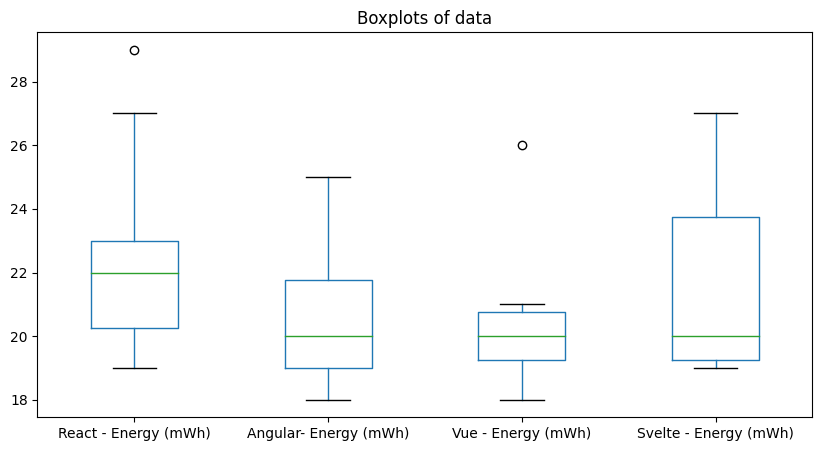

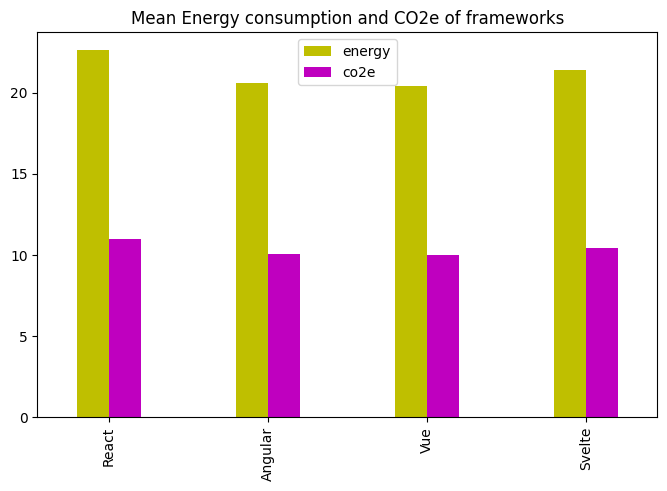

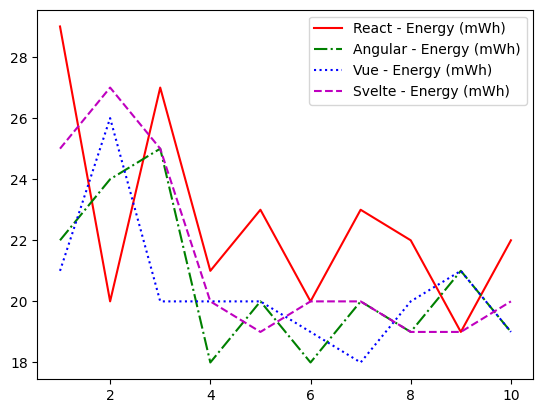

In [ ]:
# Boxplots of data
data.boxplot(column=["React - Energy (mWh)", "Angular- Energy (mWh)", "Vue - Energy (mWh)", "Svelte - Energy (mWh)"], figsize=[10,5], grid=False)
plt.title("Boxplots of data")

# Bar chart representation
energy = [np.mean(data["React - Energy (mWh)"]), np.mean(data["Angular- Energy (mWh)"]), np.mean(data["Vue - Energy (mWh)"]), np.mean(data["Svelte - Energy (mWh)"])]
co2e = [np.mean(data["React - CO2e (mg)"]), np.mean(data["Angular - CO2e (mg)"]), np.mean(data["Vue - CO2e (mg)"]), np.mean(data["Svelte - CO2e (mg)"])]
index = ['React', 'Angular', 'Vue', 'Svelte']
df = pd.DataFrame({'energy': energy,
'co2e': co2e}, index=index)
ax = df.plot.bar(color = ("y", "m"), width= 0.4, figsize=[8,5])
ax.set_title('Mean Energy consumption and CO2e of frameworks')
plt.show()

# Plot line graph for all  experiments
plt.plot(data["Test Number"], data["React - Energy (mWh)"], '-r', label='React - Energy (mWh)')
plt.plot(data["Test Number"], data["Angular- Energy (mWh)"],'-.g', label='Angular - Energy (mWh)')
plt.plot(data["Test Number"], data["Vue - Energy (mWh)"],':b', label='Vue - Energy (mWh)')
plt.plot(data["Test Number"], data["Svelte - Energy (mWh)"],'--m', label='Svelte - Energy (mWh)')
plt.legend(loc='upper right')
plt.show()